In [28]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Download the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"
Mamm = pd.read_csv(url, header=None) 
Mamm.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

# Check the data types
Mamm.dtypes

BI-RADS     object
Age         object
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object

In [16]:
# Corece to numeric and impute medians for BI-RADS column
Mamm.loc[:, "BI-RADS"] = pd.to_numeric(Mamm.loc[:, "BI-RADS"], errors='coerce')
# errors= xxx define whether to report there is an error when converting the data

HasNan = np.isnan(Mamm.loc[:,"BI-RADS"])
Mamm.loc[HasNan, "BI-RADS"] = np.nanmedian(Mamm.loc[:,"BI-RADS"])

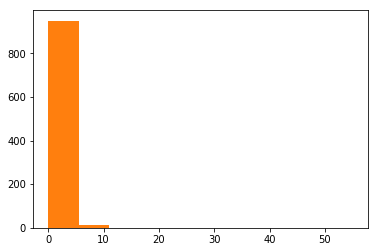

In [15]:
# Check the distribution of the "BI-RADS" column
plt.hist(Mamm.loc[:, "BI-RADS"])
plt.hist(Mamm.loc[:, "BI-RADS"]);  # This way array will not be displayed

In [17]:
# Replace outlier
TooHigh = Mamm.loc[:, "BI-RADS"] > 6

Mamm.loc[TooHigh, "BI-RADS"] = 6
# Set outliers to 6

(array([  5.,   0.,   0.,  14.,   0.,  36., 549.,   0., 345.,  12.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

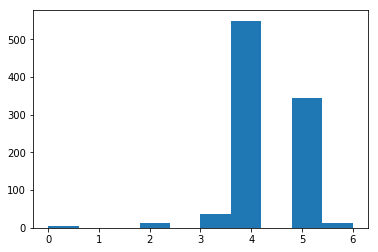

In [18]:
# Check the distribution of the "BI-RADS" column
plt.hist(Mamm.loc[:, "BI-RADS"])

In [19]:
# Corece to numeric and impute medians for Age column
Mamm.loc[:, "Age"] = pd.to_numeric(Mamm.loc[:, "Age"], errors='coerce')
HasNan = np.isnan(Mamm.loc[:,"Age"]) 
Mamm.loc[HasNan, "Age"] = np.nanmedian(Mamm.loc[:,"Age"])

(array([ 29.,  41.,  96., 153., 155., 210., 172.,  77.,  26.,   2.]),
 array([18. , 25.8, 33.6, 41.4, 49.2, 57. , 64.8, 72.6, 80.4, 88.2, 96. ]),
 <a list of 10 Patch objects>)

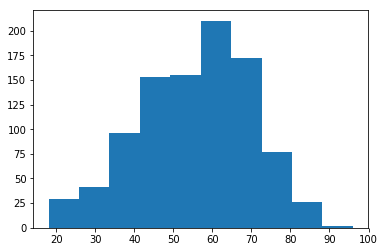

In [20]:
# Check the distribution of the "Age" column
plt.hist(Mamm.loc[:, "Age"])


In [21]:
# The next ordinal or numeric column is >Density<. 
# Corece to numeric and impute medians for Density column
Mamm.loc[:, "Density"] = pd.to_numeric(Mamm.loc[:, "Density"], errors='coerce')
HasNan = np.isnan(Mamm.loc[:,"Density"])
Mamm.loc[HasNan, "Density"] =  np.nanmedian(Mamm.loc[:,"Density"])

(array([ 16.,   0.,   0.,  59.,   0.,   0., 874.,   0.,   0.,  12.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

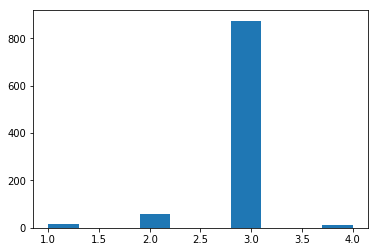

In [22]:
# Check the distribution of the "Density" column
plt.hist(Mamm.loc[:, "Density"]) 

(array([516.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

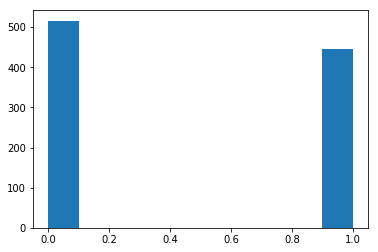

In [23]:
# Check the distribution of the "Severity" column
plt.hist(Mamm.loc[:, "Severity"]) 

In [24]:
# Check the data types
Mamm.dtypes

BI-RADS     float64
Age         float64
Shape        object
Margin       object
Density     float64
Severity      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120e07c50>,
      dtype=object)

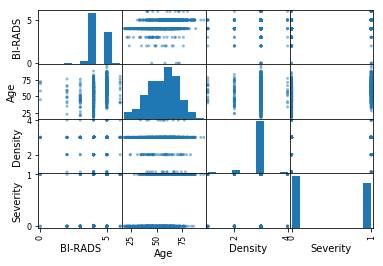

In [29]:
# Plot all the numeric columns against each other
scatter_matrix(Mamm) 

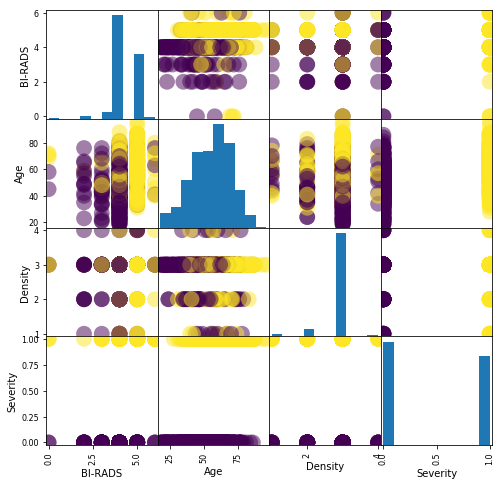

In [30]:
_ = scatter_matrix(Mamm, c=Mamm.loc[:,"Severity"], figsize=[8,8], s=1000)
# s=1000 is the size of the dots 

In [31]:
# Remove rows that contain one or more NaN
Mamm_FewerRows = Mamm.dropna(axis=0)
# Data.dropna(axis=0)
# dropna()
# axis=0 means drop that row of the data 

In [32]:
# Check the first rows of the data frame
Mamm_FewerRows.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3,5,3.0,1
1,4.0,43.0,1,1,3.0,1
2,5.0,58.0,4,5,3.0,1
3,4.0,28.0,1,1,3.0,0
4,5.0,74.0,1,5,3.0,1


In [33]:
# Check the number of rows and columns
Mamm_FewerRows.shape
##############

(961, 6)

In [34]:
# Remove columns that contain one or more NaN
Mamm_FewerCols = Mamm.dropna(axis=1)

In [36]:
# Check the first rows of the data frame
Mamm_FewerCols.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3,5,3.0,1
1,4.0,43.0,1,1,3.0,1
2,5.0,58.0,4,5,3.0,1
3,4.0,28.0,1,1,3.0,0
4,5.0,74.0,1,5,3.0,1


In [38]:
# Check the number of rows and columns
Mamm_FewerCols.shape

(961, 6)